In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import pickle
import os
import shutil
import plotly.express as px

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
dataset['Genre'] = dataset['Genre'].replace({"Male":0, "Female":1})

In [3]:
dataset.drop(['CustomerID','Genre'], axis=1, inplace=True)

In [5]:
X = dataset.iloc[:,:]

In [6]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
def dendrogram(data, method=None):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(data, method=method))
    plt.savefig('Dendrogram.png')

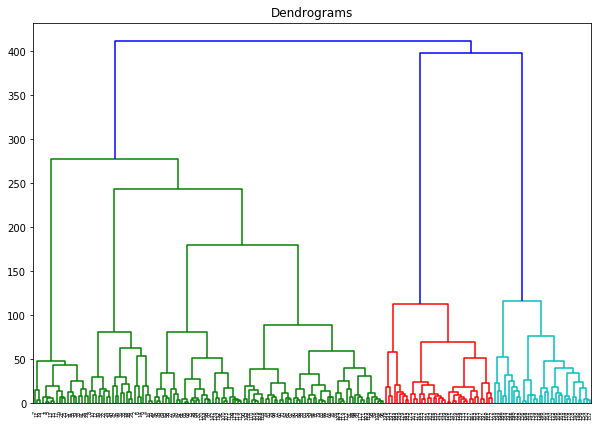

In [8]:
dendrogram(X, 'ward')

In [14]:
def save_model(model, filename):
    with open(filename+'.sav','wb') as f:
        pickle.dump(model,f)
    return 'success'

In [15]:
def dataintocsv(data, clusters):
    data['Clusters'] = clusters
    data.to_csv('Final_HC_Clustered_Data.csv')
    return data

In [46]:
def hierarichal(data, linkage=None, threshold=None):
    cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage=linkage, distance_threshold=threshold)
    cluster.fit_predict(data)
    save_model(cluster, 'Agglomerative')
    clusters = cluster.labels_
    dataintocsv(data, clusters)
    for i in range(len(set(clusters))):
        plt.scatter(data.iloc[:,0],data.iloc[:,1], c=cluster.labels_, cmap='rainbow')
        plt.savefig('Clustered_Scatter_Graph.png')
    return clusters 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

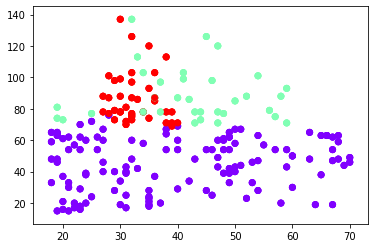

In [47]:
clusters=hierarichal(X,'ward',350)
clusters

In [50]:
from mpl_toolkits import mplot3d

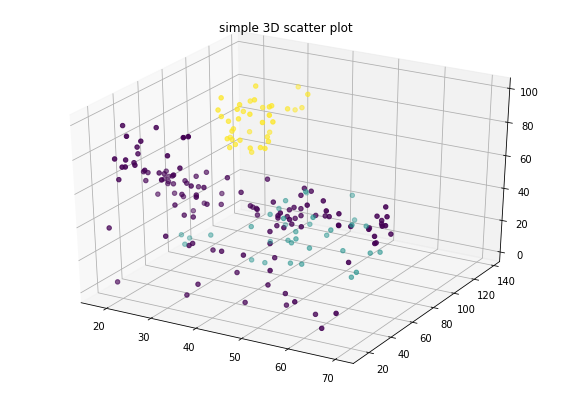

In [53]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c = clusters)
plt.title("simple 3D scatter plot")
plt.savefig('sample.png')